In [75]:
import pandas as pd
import altair as alt
import plotly.express as px
import numpy as np

### Data Import

In [2]:
filepath = "/Users/noahrae-grant/nohrg/MRFRS-stats-analysis/data/clean/"
applications = pd.read_csv(filepath + "applications.csv", index_col=0)

# uncomment top, comment bottom if first time running
#adoptions = pd.read_csv(filepath + "adopter.csv", index_col=0)
adoptions = pd.read_csv(filepath + 'adopter_updated.csv', index_col=0)

calendar = pd.read_csv(filepath + "calendar.csv")


catdata = pd.read_csv(filepath + "catdata.csv", index_col=0)
hardtoplace = pd.read_csv(filepath + "hardtoplace.csv", index_col=0)

### Summary Statistics

In [3]:
applications.shape

(8251, 11)

In [4]:
applications.head()

,Application ID,Application Type,Application Received Date/Time,Status,Application Status Date/Time,Application Note,Person ID,City,State,County,Zip
0,4444701,Cat Adoption Application,"01/01/2021, 6:54 am",Accepted,"03/05/2022, 12:10 pm",—,MER-P-17076,Groveland,MA,MA,01834
1,4444702,Cat Adoption Application,"01/01/2021, 8:34 am",Accepted,"03/05/2022, 11:55 am",—,MER-P-17075,Lawrence,MA,Essex,01841
2,4444703,Cat Adoption Application,"01/01/2021, 11:22 am",Accepted,"03/05/2022, 11:54 am",—,MER-P-17074,Mattapan,MA,United states,02126
3,4444704,Cat Adoption Application,"01/01/2021, 3:27 pm",Accepted,"03/05/2022, 11:53 am",—,MER-P-17073,Lynnfield,MA,NaN,01940
4,4444705,Cat Adoption Application,"01/01/2021, 3:51 pm",Accepted,"03/05/2022, 11:51 am",—,MER-P-17072,Methuen,MA,NaN,01844


In [5]:
applications.columns

Index(['Application ID', 'Application Type', 'Application Received Date/Time',
       'Status', 'Application Status Date/Time', 'Application Note',
       'Person ID', 'City', 'State', 'County', 'Zip'],
      dtype='object')

In [3]:
applications["Year"] = pd.to_datetime(applications["Application Received Date/Time"], format='mixed').dt.year

In [4]:
applications["Year"].value_counts()

Year
2021    1892
2023    1844
2024    1747
2022    1700
2025    1068
Name: count, dtype: int64

In [5]:
applications["City and State"] = applications["City"] + ", " + applications["State"]

In [6]:
applications["City and State"].value_counts()

City and State
Haverhill, MA          590
Amesbury, MA           477
Newburyport, MA        380
Salisbury, MA          253
Boston, MA             175
                      ... 
Center Sandwich, NH      1
Warren, NH               1
Fresno, NH               1
Ashaway, RI              1
Georgetown, ME           1
Name: count, Length: 562, dtype: int64

In [10]:
adoptions.shape

(3053, 15)

In [11]:
adoptions.head()

,Date Of Adoption,Animal ID,Animal Name,Species,Primary Breed,Sex,Altered,Est. Birthdate,Microchip Number,By (User),Outcome Subtype,Adopter ID,City,State,Zip
0,01/03/2021,MER-A-158,Oberon,Cat,Domestic Medium Hair,Male,Yes,06/01/2015,985112007171202,mer_jmccormack,Adoption,MER-P-14391,Danvers,MA,01923
1,01/03/2021,MER-A-70,Cleopatra,Cat,Domestic Medium Hair,Female,Yes,11/05/2013,985141002756186,mer_jmccormack,Adoption,MER-P-14392,Hampton,NH,03842
2,01/06/2021,MER-A-130,Princess,Cat,Domestic Shorthair,Female,Yes,11/24/2013,985141002878981,mer_jmccormack,Adoption,MER-P-14394,Kingston,NH,03848
3,01/09/2021,MER-A-114,Mugshot,Cat,Domestic Shorthair,Male,Yes,10/06/2018,985112010662548,mer_jmccormack,Adoption,MER-P-14397,Ayer,MA,01432
4,01/12/2021,MER-A-159,Simon,Cat,Domestic Shorthair,Male,Yes,12/30/2012,985141002879119,mer_jmccormack,Adoption,MER-P-14428,Brighton,MA,02135


In [7]:
adoptions["City and State"] = adoptions["City"] + ", " + adoptions["State"]

In [8]:
adoptions["City and State"].value_counts()

City and State
Haverhill, MA           239
Amesbury, MA            224
Newburyport, MA         173
Salisbury, MA           110
Hampton, NH              67
                       ... 
Rockland, MA              1
Weare, NH                 1
Marshfield Hills, NH      1
South Portland, ME        1
Georgetown, ME            1
Name: count, Length: 284, dtype: int64

# Adoption Policy

## Q1: Are there patterns to adoption applicants that can be used for targeted marketing efforts in communities?

In [14]:
def alt_pie_chart(data, name_field, value_field, title):

    base = alt.Chart(
        data,
        title = title
    ).encode(
        alt.Theta(value_field).stack(True),
        alt.Color(name_field).scale(scheme="category20")
    )
    
    pie = base.mark_arc(
        outerRadius=150,
        opacity=0.9,
        stroke='black',
        strokeOpacity=0.5
    )

    text = base.mark_text(
        radius=165, size=15
    ).encode(
        text=value_field
    ).properties(
        height = 400
    )

    return (text + pie).configure_legend(
        orient="right",
        offset=250,
        symbolStrokeWidth=0
    )

In [9]:
city_counts = applications[["City and State", "State"]].groupby("City and State").value_counts().reset_index()
city_counts = city_counts.rename(columns={"count":"Applications"})

In [10]:
city_counts.loc[city_counts['Applications'] < 10, 'City and State'] = 'Other'

In [17]:
alt_pie_chart(city_counts, "City and State", "Applications", "Test")

alt.LayerChart(...)

In [18]:
alt_pie_chart(city_counts[:20], "City and State", "Applications", "The 20 cities with the most adoption applications")

alt.LayerChart(...)

In [19]:
alt_pie_chart(city_counts[20:39], "City and State", "Applications", "21st-39th cities with the most adoption applications")

alt.LayerChart(...)

In [20]:
sum(city_counts[city_counts["Applications"] > 50]["Applications"])/sum(city_counts["Applications"])

0.6070562560620757

In [11]:
relevant_apps = city_counts[city_counts["Applications"] > 50]
relevant_apps

,City and State,State,Applications
8,"Amesbury, MA",MA,477
12,"Andover, MA",MA,76
46,"Beverly, MA",MA,115
51,"Boston, MA",MA,175
61,"Brighton, MA",MA,60
72,"Byfield, MA",MA,64
73,"Cambridge, MA",MA,95
108,"Danvers, MA",MA,102
114,"Derry, NH",NH,75
119,"Dover, NH",NH,99


In [12]:
adopt_counts = adoptions[["City and State", "State"]].groupby("City and State").value_counts().reset_index()
adopt_counts = adopt_counts.rename(columns={"count":"Adoptions"})

In [13]:
relevant_adopts = adopt_counts[adopt_counts["City and State"].isin(relevant_apps["City and State"].unique())].reset_index()

In [14]:
relevant_adopts

,index,City and State,State,Adoptions
0,2,"Amesbury, MA",MA,224
1,4,"Andover, MA",MA,28
2,21,"Beverly, MA",MA,46
3,25,"Boston, MA",MA,35
4,29,"Brighton, MA",MA,20
5,35,"Byfield, MA",MA,23
6,36,"Cambridge, MA",MA,28
7,55,"Danvers, MA",MA,51
8,59,"Derry, NH",NH,38
9,60,"Dover, NH",NH,46


In [25]:
alt_pie_chart(relevant_adopts[:20], "City and State", "Adoptions", "Adoption counts (top 20 cities)")

alt.LayerChart(...)

In [26]:
alt_pie_chart(relevant_adopts[20:], "City and State", "Adoptions", "Adoption counts (top 21st-39th cities)")

alt.LayerChart(...)

In [27]:
sum(relevant_adopts["Adoptions"])/sum(adopt_counts["Adoptions"])

0.6778105539167486

In [15]:
relevant_apps = relevant_apps.sort_values('City and State')
relevant_adopts = relevant_adopts.sort_values('City and State')

In [16]:
expected_apps = relevant_apps['Applications'].to_numpy()
expected_apps = expected_apps/sum(expected_apps)

actual_adopts = relevant_adopts['Adoptions'].to_numpy()
actual_adopts = actual_adopts/sum(actual_adopts)

In [30]:
relevant_adopts

,index,City and State,Adoptions
1,1,"Amesbury, MA",224
30,31,"Andover, MA",28
14,14,"Beverly, MA",46
22,22,"Boston, MA",35
37,40,"Brighton, MA",20
33,34,"Byfield, MA",23
31,32,"Cambridge, MA",28
10,10,"Danvers, MA",51
18,18,"Derry, NH",38
13,13,"Dover, NH",46


In [17]:
from scipy.stats import bartlett,levene,skewtest,chisquare

chisquare(actual_adopts, expected_apps)

Power_divergenceResult(statistic=np.float64(0.03846959166143786), pvalue=np.float64(1.0))

In [32]:
bartlett(actual_adopts, expected_apps)

BartlettResult(statistic=np.float64(0.19739865080652175), pvalue=np.float64(0.6568288245232556))

In [33]:
levene(actual_adopts, expected_apps)

LeveneResult(statistic=np.float64(0.03080139409465932), pvalue=np.float64(0.8611509725037505))

In [34]:
skewtest(expected_apps)

SkewtestResult(statistic=np.float64(5.265551052597319), pvalue=np.float64(1.397694700597389e-07))

#### Rejections

In [18]:
rejections = '. '.join(applications[applications['Status'] == 'Denied']['Application Note'].values)

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(rejections.lower())

# additionally want to remove certain domain words or misc unhelpful words
domain_words = ['cat', 'kitten', 'adoption', 'etc', 'said', 'says', 'goes', 'take', 'sure', 'y/o', '-cm', 'joan']
stop_words = stop_words.union(domain_words)

filtered_tokens = [word.strip() for word in tokens if word not in stop_words]
filtered_tokens = [token for token in filtered_tokens if len(token) > 2]

[nltk_data] Downloading package punkt_tab to /Users/noahrae-
[nltk_data]     grant/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/noahrae-
[nltk_data]     grant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/noahrae-
[nltk_data]     grant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


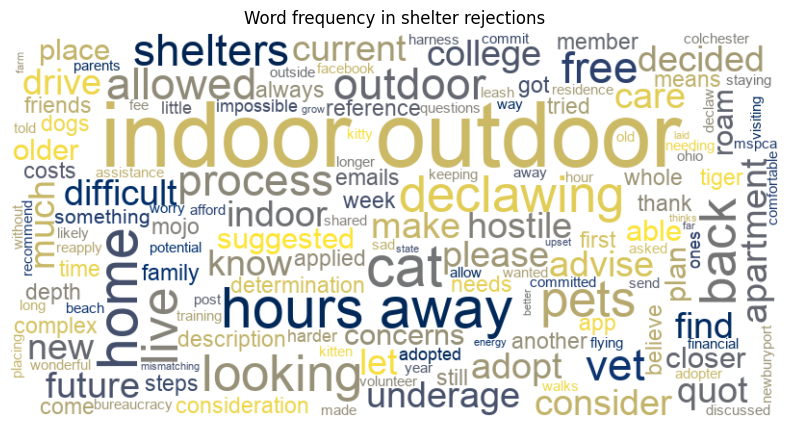

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="#FFFFFF", 
                      colormap='cividis', 
                      font_path="/System/Library/Fonts/Supplemental/Arial.ttf").generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Word frequency in shelter rejections", )
plt.show()

In [38]:
from collections import Counter
Counter(filtered_tokens)

Counter({'indoor/outdoor': 19,
         'away': 6,
         'would': 5,
         'hours': 5,
         'home': 5,
         'cats': 4,
         'looking': 4,
         'declawing': 4,
         'pets': 4,
         'back': 4,
         'outdoor': 3,
         'process': 3,
         'vet': 3,
         'allowed': 3,
         'get': 3,
         'free': 3,
         'shelters': 3,
         'much': 2,
         'let': 2,
         'adopt': 2,
         'please': 2,
         'advise': 2,
         'quot': 2,
         'live': 2,
         'future': 2,
         'care': 2,
         'apartment': 2,
         'hostile': 2,
         'difficult': 2,
         'make': 2,
         'new': 2,
         '...': 2,
         'find': 2,
         'underage': 2,
         'lives': 2,
         'college': 2,
         'current': 2,
         'consider': 2,
         'decided': 2,
         'indoor': 2,
         'drive': 2,
         'suggested': 2,
         'closer': 2,
         'concerns': 2,
         'able': 2,
         'plan': 2,

In [20]:
applications[(applications['Status'] == 'Denied') & (applications['Application Note'] == '—')]['City'].value_counts()

City
Newburyport      21
Amesbury         20
Salisbury        14
Seabrook         11
Haverhill        11
                 ..
Woburn            1
Kensington        1
Millbury          1
North Reading     1
Anchorage         1
Name: count, Length: 108, dtype: int64

# Distances

In [21]:
adopt_citystate = adoptions["City and State"].unique()

In [41]:
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim
from time import sleep

geolocator = Nominatim(user_agent='MyApp')

shelter_city = "Salisbury, Ma"
location_shelter = geolocator.geocode(shelter_city)
lat_long_shelter = (location_shelter.latitude ,location_shelter.longitude)

In [42]:
def calc_distance(city, shelter_latlong):
    # Calculates distance in miles between a city and the shelter
    try:
        sleep(0.5)
        location_city = geolocator.geocode(city)
        lat_long_city = (location_city.latitude ,location_city.longitude)
        
        return GD(lat_long_city, shelter_latlong).mi
    except:
        return city

In [50]:
distances = []
for i in range(len(adopt_citystate)):
    try:
        distances.append(calc_distance(adopt_citystate[i], lat_long_shelter))
    except:
        print(i)
        break

In [51]:
# the errors, looking up these and pulling the distances manually.
[(i, x) for i, x in enumerate(distances) if not type(x) == float]

[(1, 'Hampton, NH'),
 (65, 'Norton, MA'),
 (144, 'Lebanon, ME'),
 (202, 'O3865, NH'),
 (218, 'Norton, NH'),
 (256, 'Chestnut Hill, MA')]

In [52]:
# data pulled from https://www.distancefromto.net/
distances[1] = 6.92
distances[65] = 62.7
distances[144] = 38.77
distances[202] = 11.89 # this is Plaistow, NH, 
distances[218] = 30.34
distances[256] = 39.38

In [ ]:
distances

In [31]:
town_dist = dict([(adopt_citystate[i], distances[i]) for i in range(len(distances))])

NameError: name 'distances' is not defined

In [67]:
def dist_from_salisbury(elem):
    # using the city/state
    return town_dist[elem]

adoptions["Distance from Shelter"] = adoptions["City and State"].apply(dist_from_salisbury)
# Saving distances for later so I don't have to recalculate this again.
# accidentally rerunning everything once was enough of a mistake to make
adoptions.to_csv(filepath + "adopter_updated.csv")

In [23]:
adoptions.loc[adoptions["City and State"] == "Wilmington, AA", "Distance from Shelter"] = calc_distance("Wilmington, MA", lat_long_shelter)

NameError: name 'calc_distance' is not defined

In [24]:
len(adoptions[adoptions["Distance from Shelter"] < 20])/len(adoptions)

0.6148051097281363

In [25]:
fig = px.histogram(
    adoptions[adoptions["Distance from Shelter"] < 100], 
    x="Distance from Shelter", 
    nbins=50,
    title="Over 60% of all adopters live within 20 miles of the shelter",
    subtitle = "7 of the 9 adoptions outside a 100-mile radius were of undersocialized cats")
# fig.add_vline(x=adoptions["Distance from Shelter"].median(),
#               annotation_text = f"Median: {adoptions["Distance from Shelter"].median():.2f} miles")
fig.add_vline(x=adoptions["Distance from Shelter"].mean(),
              annotation_text = f"Mean: {adoptions["Distance from Shelter"].mean():.2f} miles")
fig.update_layout(bargap = 0.1)
fig.show()

In [26]:
adopt_counts = adopt_counts.sort_values("Adoptions", ascending=False)

In [27]:
adopt_counts[:4]["Adoptions"].sum()/adopt_counts["Adoptions"].sum()

np.float64(0.2445099967223861)

In [28]:
adopt_where = px.bar(
       adopt_counts[:20], 
       x="City and State", 
       y="Adoptions",
       title = "50% of adopters are from these 20 towns",
       subtitle="Lowell, MA, is the furthest away at 26.7 miles",
       color="State")
adopt_where.update_xaxes(
       tickangle=50
)

adopt_where.show()

Town populations: 
- 'Haverhill, MA': 67,787
- 'Amesbury, MA': 17,366
- 'Newburyport, MA': 18,289
- 'Salisbury, MA': 9,236
- 'Hampton, NH': 16,214
- 'Merrimac, MA': 6,723
- 'Exeter, NH': 16,049
- 'Seabrook, NH': 8,401
- 'North Andover, MA': 30,915
- 'Ipswich, MA': 13,785 
- 'Georgetown, MA': 8,470
- 'Danvers, MA': 28,087
- 'Rowley, MA': 6,161
- 'Dover, NH': 32,741
- 'Beverly, MA': 42,670 
- 'Lowell, MA': 115,554
- 'Plaistow, NH': 7,830
- 'Portsmouth, NH': 21,956
- 'Derry, NH': 34,317
- 'West Newbury, MA': 4,500

In [29]:
ad_most_cities = adopt_counts[:20]["City and State"].tolist()
most_adopt_cities = pd.DataFrame(ad_most_cities, columns=["City and State"])

In [33]:
adoptions.head()

,Date Of Adoption,Animal ID,Animal Name,Species,Primary Breed,Sex,Altered,Est. Birthdate,Microchip Number,By (User),Outcome Subtype,Adopter ID,City,State,Zip,City and State,Distance from Shelter
0,01/03/2021,MER-A-158,Oberon,Cat,Domestic Medium Hair,Male,Yes,06/01/2015,985112007171202,mer_jmccormack,Adoption,MER-P-14391,Danvers,MA,01923,"Danvers, MA",19.399344
1,01/03/2021,MER-A-70,Cleopatra,Cat,Domestic Medium Hair,Female,Yes,11/05/2013,985141002756186,mer_jmccormack,Adoption,MER-P-14392,Hampton,NH,03842,"Hampton, NH",6.920000
2,01/06/2021,MER-A-130,Princess,Cat,Domestic Shorthair,Female,Yes,11/24/2013,985141002878981,mer_jmccormack,Adoption,MER-P-14394,Kingston,NH,03848,"Kingston, NH",11.779660
3,01/09/2021,MER-A-114,Mugshot,Cat,Domestic Shorthair,Male,Yes,10/06/2018,985112010662548,mer_jmccormack,Adoption,MER-P-14397,Ayer,MA,01432,"Ayer, MA",41.875386
4,01/12/2021,MER-A-159,Simon,Cat,Domestic Shorthair,Male,Yes,12/30/2012,985141002879119,mer_jmccormack,Adoption,MER-P-14428,Brighton,MA,02135,"Brighton, MA",37.300947


In [40]:
temp = adoptions[["City and State", "Distance from Shelter"]].value_counts().to_dict()
town_dist = {i[0]:i[1] for i in temp.keys()}

In [42]:
most_adopt_cities["Distance"] = most_adopt_cities["City and State"].apply(
    lambda x: town_dist[x]
)

In [43]:
def city_adopts(elem):
    return adopt_counts[adopt_counts["City and State"] == elem]["Adoptions"].values[0]
def state(elem):
    return adopt_counts[adopt_counts["City and State"] == elem]["State"].values[0]

most_adopt_cities["Adoptions"] = most_adopt_cities["City and State"].apply(
    city_adopts
)
most_adopt_cities["State"] = most_adopt_cities["City and State"].apply(
    state
)

In [44]:
# according to 2020 census
town_pop = {
    'Haverhill, MA': 67787,
    'Amesbury, MA': 17366,
    'Newburyport, MA': 18289,
    'Salisbury, MA': 9236,
    'Hampton, NH': 16214,
    'Merrimac, MA': 6723,
    'Exeter, NH': 16049,
    'Seabrook, NH': 8401,
    'North Andover, MA': 30915,
    'Ipswich, MA': 13785 ,
    'Georgetown, MA': 8470,
    'Danvers, MA': 28087,
    'Rowley, MA': 6161,
    'Dover, NH': 32741,
    'Beverly, MA': 42670 ,
    'Lowell, MA': 115554,
    'Plaistow, NH': 7830,
    'Portsmouth, NH': 21956,
    'Derry, NH': 34317,
    'West Newbury, MA': 4500}

In [45]:
most_adopt_cities["Population"] = most_adopt_cities["City and State"].apply(
    lambda x: town_pop[x]
)

In [46]:
adopt_scatter = px.scatter(most_adopt_cities, 
           x="Distance", 
           y="Adoptions", 
           labels = {"Distance":"Distance (miles)"},
           size="Population",
           text=[e[:-4] if e in (["Haverhill, MA", "Salisbury, MA", "Newburyport, MA", "Amesbury, MA"]) else "" for e in most_adopt_cities["City and State"].tolist()],
           hover_data="City and State",
           color="State",
           title="Four towns/cities have significantly more adoptions than the rest",
           subtitle = f'Most of the other top towns/cities have had around 50 adoptions in the last 5 years')
adopt_scatter.update_layout(
    margin = {"t":125}
).update_traces(textposition="bottom right")

In [47]:
town_dist["Haverhill, MA"]

11.861460536822843

In [48]:
town_pop["Haverhill, MA"]

67787

10 miles or less (8 towns/cities)
- Salisbury
- Newburyport
- Hampton
- Amesbury
- Merrimac
- Seabrook
- Rowley
- West Newbury

10-20 miles: (8 towns/cities)
- Haverhill
- Exeter
- Ipswich
- Georgetown
- Plaistow
- North Andover
- Danvers
- Portsmouth

20+ miles: (4 towns/cities)
- Beverly
- Lowell
- Dover
- Derry

In [49]:
most_adopt_cities["Adopt/Pop Ratio"] = most_adopt_cities["Adoptions"]/(most_adopt_cities["Population"])

In [50]:
ratio = px.bar(
    most_adopt_cities.sort_values("Distance"), 
    x="City and State", 
    y="Adopt/Pop Ratio",
    labels={"City and State": "City (ordered by distance from Salisbury)",
            "Adopt/Pop Ratio": "Adoptions<br>(normalized by population)"},
    title="Seabrook and Hampton have a noticeably lower amount of adoptions<br>relative to population than other towns within a 10 mile radius of Salisbury.",
    #color="State"
)
ratio.update_layout(
    margin = {"r":0.1}
)
ratio.add_vline(x=7.5, annotation_text = "10 miles")
ratio.show()

In [51]:
distant_adopts_cats = adoptions[adoptions["Distance from Shelter"] > 100]["Animal ID"]

In [52]:
hardtoplace[hardtoplace["Animal ID"].isin(distant_adopts_cats)]

,Animal ID,Name,Attributes,Outcome Date,Outcome Type,Type
380,MER-A-1792,Patty,Undersocialized,09/23/2022,Adoption,Behavioral
554,MER-A-2357,Oreo,Undersocialized,05/09/2023,Adoption,Behavioral
648,MER-A-2847,Maeve,Undersocialized,09/07/2023,Adoption,Behavioral
657,MER-A-2778,Blair,Housesoiling,09/19/2023,Adoption,Behavioral
696,MER-A-2831,Moana,Undersocialized,10/26/2023,Adoption,Behavioral
1261,MER-A-5429,Kanan,Undersocialized,06/14/2025,Adoption,Behavioral
1261,MER-A-5429,Kanan,Kitten Rabies Disclaimer,06/14/2025,Adoption,Medical
1289,MER-A-5331,Frigidaire,Undersocialized,07/16/2025,Adoption,Behavioral
1289,MER-A-5331,Frigidaire,FIV+,07/16/2025,Adoption,Medical
1289,MER-A-5331,Frigidaire,Dental disease- moderate,07/16/2025,Adoption,Medical


In [53]:
len(set(applications["City and State"].unique().tolist()))

563

In [ ]:
#app_not_adopt_cities = list(set(applications["City and State"].unique().tolist()).difference(set(adopt_citystate)))

In [ ]:
# app_NA_dists = []
# for i in range(len(app_not_adopt_cities)):
#     try:
#         app_NA_dists.append(calc_distance(app_not_adopt_cities[i], lat_long_shelter))
#     except:
#         print(i)
#         break

In [ ]:
# [(i, x) for i, x in enumerate(app_NA_dists) if not type(x) == float]

37

## Q2: What adoption patterns can MRFRS capitalize on to more successfully adopt out cats with behavioral and medical issues?

## Q3: Are adoption events more effective than ”business as usual”?

In [56]:
calendar = calendar.drop(columns='Unnamed: 4')

In [61]:
calendar["Start Date"] = pd.to_datetime(calendar["Start Date"])
calendar["End Date"] = pd.to_datetime(calendar["End Date"])

In [ ]:
adopt_event_ranges = calendar.loc[calendar["Event Type"] == "Adoption", ["Start Date", "End Date"]].to_numpy()
fund_event_ranges = calendar.loc[calendar["Event Type"] == "Fundraiser", ["Start Date", "End Date"]].to_numpy()

In [70]:
adoptions["Date Of Adoption"] = pd.to_datetime(adoptions["Date Of Adoption"])

In [76]:
adopt_event_adopts = [adoptions["Date Of Adoption"].between(d[0], d[1]) for d in adopt_event_ranges]
adopt_event_df = adoptions[np.logical_or.reduce(adopt_event_adopts)]

In [77]:
adopt_event_df

,Date Of Adoption,Animal ID,Animal Name,Species,Primary Breed,Sex,Altered,Est. Birthdate,Microchip Number,By (User),Outcome Subtype,Adopter ID,City,State,Zip,City and State,Distance from Shelter
1260,2023-07-14,MER-A-2522,Belle,Cat,Domestic Medium Hair,Female,Yes,04/17/2023,985141006159108,mer_cmansur,Adoption,MER-P-19341,Groveland,MA,01834,"Groveland, MA",10.397803
1261,2023-07-14,MER-A-2633,Mira,Cat,Domestic Shorthair,Female,Yes,03/25/2023,985141006159205,mer_cmansur,Adoption,MER-P-14206,Kingston,NH,03848,"Kingston, NH",11.779660
1262,2023-07-14,MER-A-2635,Carina,Cat,Domestic Shorthair,Female,Yes,03/25/2023,985141006161227,mer_cmansur,Adoption,MER-P-14206,Kingston,NH,03848,"Kingston, NH",11.779660
1263,2023-07-14,MER-A-2509,Dill,Cat,Domestic Shorthair,Male,Yes,04/22/2023,985141006159572,mer_cmansur,Adoption,MER-P-19339,Danvers,MA,01923,"Danvers, MA",19.399344
1264,2023-07-14,MER-A-2510,Gherkin,Cat,Domestic Shorthair,Female,Yes,04/22/2023,985141006160734,mer_cmansur,Adoption,MER-P-19339,Danvers,MA,01923,"Danvers, MA",19.399344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,2025-08-15,MER-A-5515,Tripoli,Cat,Domestic Shorthair,Male,Yes,06/10/2018,985113009481162,mer_cmansur,Adoption,MER-P-22427,Kingston,NH,03848,"Kingston, NH",11.779660
2931,2025-08-15,MER-A-5618,Snowball,Cat,Domestic Medium Hair,Male,Yes,06/05/2025,985113009442100,mer_cmansur,Adoption,MER-P-8909,Haverhill,MA,01835,"Haverhill, MA",11.861461
2932,2025-08-16,MER-A-5496,Molly,Cat,Domestic Shorthair,Female,Yes,06/03/2023,985113009442108,mer_cmansur,Adoption,MER-P-22364,Wakefield,MA,01880,"Wakefield, MA",25.558585
2933,2025-08-16,MER-A-5493,Tenzin,Cat,Domestic Medium Hair,Male,Yes,06/01/2025,985113009440846,mer_cmansur,Adoption,MER-P-22436,Concord,NH,03301,"Concord, NH",42.571710


In [78]:
fund_event_adopts = [adoptions["Date Of Adoption"].between(d[0], d[1]) for d in fund_event_ranges]
fund_event_df = adoptions[np.logical_or.reduce(fund_event_adopts)]

In [79]:
fund_event_df

,Date Of Adoption,Animal ID,Animal Name,Species,Primary Breed,Sex,Altered,Est. Birthdate,Microchip Number,By (User),Outcome Subtype,Adopter ID,City,State,Zip,City and State,Distance from Shelter
516,2022-05-03,MER-A-1510,Alfred,Cat,Domestic Shorthair,Male,Yes,01/31/2022,985141004545594,mer_lkirby,Adoption,MER-P-17431,Shapleigh,ME,04076,"Shapleigh, ME",48.241381
517,2022-05-03,MER-A-1509,Jeeves,Cat,Domestic Shorthair,Male,Yes,01/31/2022,985141004538381,mer_lkirby,Adoption,MER-P-17431,Shapleigh,ME,04076,"Shapleigh, ME",48.241381
518,2022-05-04,MER-A-1563,Loki,Cat,Domestic Shorthair,Male,Yes,10/27/2020,985141004544808,mer_lkirby,Adoption,MER-P-17380,Dover,NH,03820,"Dover, NH",24.600170
519,2022-05-04,MER-A-1318,Bill,Cat,Domestic Shorthair,Male,Yes,03/02/2015,982091066083989,mer_lkirby,Adoption,MER-P-17222,Randolph,MA,02368,"Randolph, MA",47.790407
520,2022-05-04,MER-A-1301,Watermelon,Cat,Domestic Medium Hair,Male,Yes,02/23/2018,985141004544764,mer_lkirby,Adoption,MER-P-17222,Randolph,MA,02368,"Randolph, MA",47.790407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,2025-09-18,MER-A-5691,Charizard,Cat,Domestic Shorthair,Female,Yes,06/05/2025,985113009480517,mer_cmansur,Adoption,MER-P-22577,Brighton,MA,02135,"Brighton, MA",37.300947
3020,2025-09-18,MER-A-5311,Presto,Cat,Domestic Shorthair,Male,Yes,04/14/2024,985113009441636,mer_cmansur,Adoption,MER-P-19668,Newburyport,MA,01950,"Newburyport, MA",2.169409
3021,2025-09-19,MER-A-5790,Xanthium,Cat,Domestic Medium Hair,Female,Yes,09/16/2022,985113009479272,mer_cmansur,Adoption,MER-P-22540,Peabody,MA,01960,"Peabody, MA",21.953357
3022,2025-09-19,MER-A-5698,Juliette,Cat,Domestic Shorthair,Female,Yes,02/07/2024,985141008256023,mer_cmansur,Adoption,MER-P-19975,Amesbury,MA,01913,"Amesbury, MA",3.717496


In [92]:
total_dates = sum([(d[1] - d[0]).astype('timedelta64[D]') + 1 for d in adopt_event_ranges]) \
    + sum([(d[1] - d[0]).astype('timedelta64[D]') + 1 for d in fund_event_ranges])
total_dates

np.timedelta64(135,'D')

In [91]:
(pd.to_datetime("2025-09-30") - pd.to_datetime("2021-01-01"))

Timedelta('1733 days 00:00:00')

In [103]:
days_percent = [40/1733, 95/1733, (1733-135)/1733]

- Adopt events = 2.31% of all days between Jan 2021 and Sept 2025
- Fundraising events = 5.48%
- Non-event days = 92.21%

Hypothesis: If events work, they should have a higher % of total adoptions than their relative % of days

In [102]:
print(f"Adoption events: {len(adopt_event_df)/len(adoptions)}")
print(f"Fundraising events: {len(fund_event_df)/len(adoptions)}")
print(f"Non-event days: {(len(adoptions)-len(fund_event_df)-len(adopt_event_df))/len(adoptions)}")

Adoption events: 0.06845725515886014
Fundraising events: 0.07009498853586636
Non-event days: 0.8614477563052735


- Adoption event adopts: 6.85%
- Fundraising event adopts: 7.01%
- Non-event days adopts: 86.14%

In [104]:
adopt_percent = [len(adopt_event_df)/len(adoptions), len(fund_event_df)/len(adoptions), 
                 (len(adoptions)-len(fund_event_df)-len(adopt_event_df))/len(adoptions)]

In [109]:
from scipy.stats import describe, ttest_ind

ttest_ind(days_percent, adopt_percent)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(4.0))

In [ ]:
chisquare(adopt_percent, days_percent)

Power_divergenceResult(statistic=np.float64(0.09745180326790805), pvalue=np.float64(0.9524421567622466))

In [116]:
day_type = ["Adoption Events", "Fundraising Events", "Non-event Days"]
days = pd.DataFrame({"Day Type":day_type, "Percent of total days":days_percent, "Percent of adoptions":adopt_percent})

In [117]:
days

,Day Type,Percent of total days,Percent of adoptions
0,Adoption Events,0.023081,0.068457
1,Fundraising Events,0.054818,0.070095
2,Non-event Days,0.922100,0.861448


In [125]:
px.bar(data_frame=days,
       x="Day Type",
       y=["Percent of total days", "Percent of adoptions"],
       barmode="group").update_yaxes(hoverformat=",.2%", tickformat=",.0%")

Fail to reject null hypothesis statistically, but there's def something significant about adoption events.
test on just events, drop nonevent days?